In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [46]:
import cv2
from glob import glob
from PIL import Image
from keras.utils import to_categorical

def get_class(n):
    if n == "melanoma": return 0
    elif n == "nevus": return 1
    else: return 2
def get_files_list(data_dir):
    files = []
    for d in glob(data_dir + "/*"):
        for i in glob(d + "/*"):
            files.append(i)
            
    return files

def load_images(image_list):
    labels = []
    images = []
    for i in image_list:
        im = cv2.imread(i)
        im = cv2.resize(im, (300, 300)) 
        images.append(im)
        labels.append(get_class(i.split("/")[2]))
    
    labels = np.array(labels)
    labels_binary = to_categorical(labels, num_classes=3)
    return np.stack(images), labels_binary

train_files = get_files_list("data/train")
test_files = get_files_list("data/test")
valid_files = get_files_list("data/valid")

print(len(train_files), len(test_files), len(valid_files))


2000 600 150


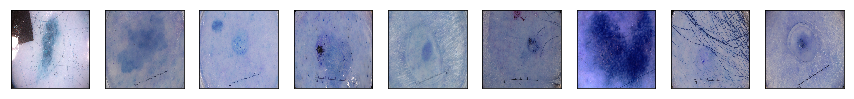

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample, _ = load_images(train_files[1:10])
fig = plt.figure(figsize=(20,5))
for i in range(len(sample)):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(sample[i])

In [4]:
def imageLoader(files, batch_size):

    L = len(files)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
            X, Y = load_images(files[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [ ]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(30, 30, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 30, 30, 16)        208       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 32)        2080      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 32)        4128      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 64)          8256      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 64)          16448     
__________

In [48]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [49]:
from keras.callbacks import ModelCheckpoint   

batch_size = 25
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='de_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(imageLoader(train_files, batch_size=batch_size),
                    steps_per_epoch=len(train_files) // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=imageLoader(valid_files, batch_size=batch_size),
                    validation_steps=len(valid_files) // batch_size)

Epoch 1/100
 - 280s - loss: 14.0711 - acc: 0.1270 - val_loss: 11.6050 - val_acc: 0.2800

Epoch 00002: val_loss did not improve from 11.60503
Epoch 3/100
 - 284s - loss: 14.0711 - acc: 0.1270 - val_loss: 11.6050 - val_acc: 0.2800

Epoch 00003: val_loss did not improve from 11.60503
Epoch 4/100
 - 275s - loss: 14.0711 - acc: 0.1270 - val_loss: 11.6050 - val_acc: 0.2800

Epoch 00004: val_loss did not improve from 11.60503
Epoch 5/100
 - 283s - loss: 14.0711 - acc: 0.1270 - val_loss: 11.6050 - val_acc: 0.2800

Epoch 00005: val_loss did not improve from 11.60503
Epoch 6/100
 - 279s - loss: 14.0711 - acc: 0.1270 - val_loss: 11.6050 - val_acc: 0.2800

Epoch 00006: val_loss did not improve from 11.60503
Epoch 7/100
 - 275s - loss: 14.0711 - acc: 0.1270 - val_loss: 11.6050 - val_acc: 0.2800

Epoch 00007: val_loss did not improve from 11.60503
Epoch 8/100
 - 281s - loss: 14.0711 - acc: 0.1270 - val_loss: 11.6050 - val_acc: 0.2800

Epoch 00008: val_loss did not improve from 11.60503
Epoch 9/100
 

KeyboardInterrupt: 

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
